# 1) 데이터 읽기

In [61]:
import pandas as pd

df = pd.read_csv('./diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
# "Outcome" 항목 삭제
df = df.drop('Outcome', axis = 1)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# 2) 결측치 확인

In [63]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# 3) 상관 관계 행렬 확인하기

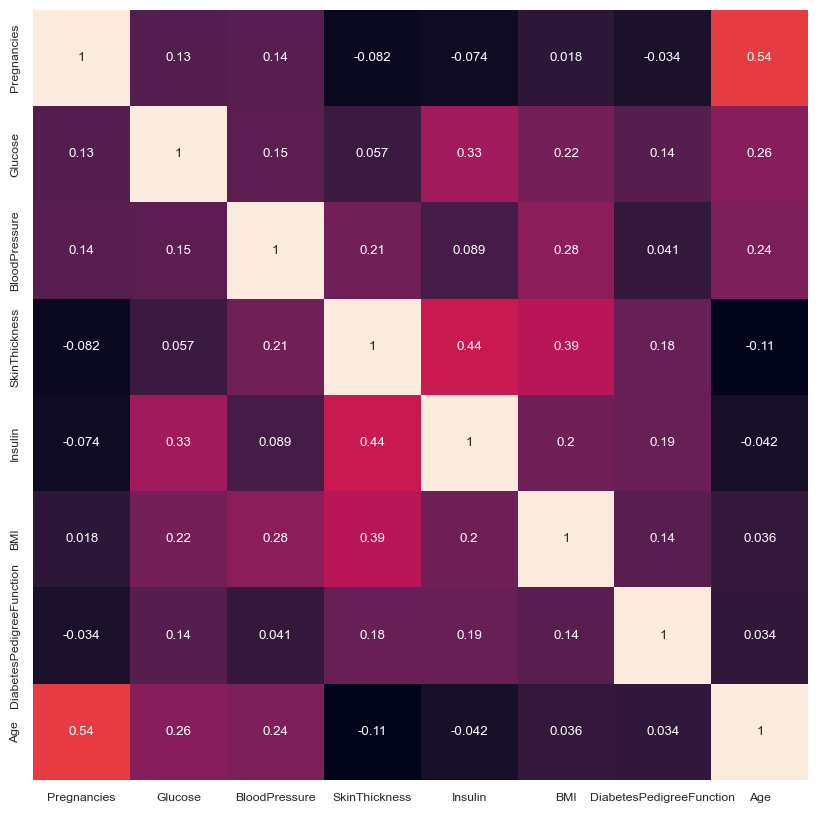

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 가장 높은 상관관계를 가진 feature : SkinThickness

# 4) X, Y 나누기

In [65]:
X = df.drop('BMI', axis = 1)
Y = df['BMI']

print(X.head())
print()
print(Y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0            6      148             72             35        0   
1            1       85             66             29        0   
2            8      183             64              0        0   
3            1       89             66             23       94   
4            0      137             40             35      168   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64


# 5) 데이터 스케일링

In [66]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.371101,1.170732


# 6) Train데이터, Test데이터 나누기

In [67]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 7) 모델 정의, 학습, 예측

## Linear Regression

평균제곱근오차 (Linear Regreesion) 49.41151592580262


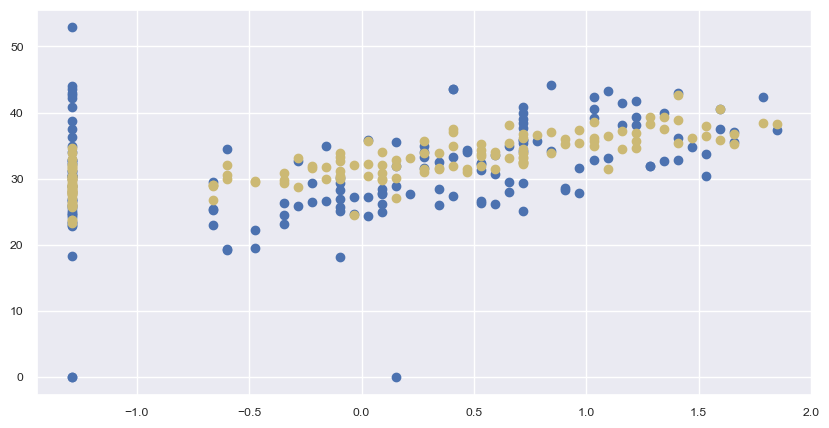

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, Y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차 (Linear Regreesion)', mean_squared_error(ly_preds, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], Y_test, label='Y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

## Decision Tree

평균제곱근오차 (DecisionTreeRegressor) 94.33532467532469


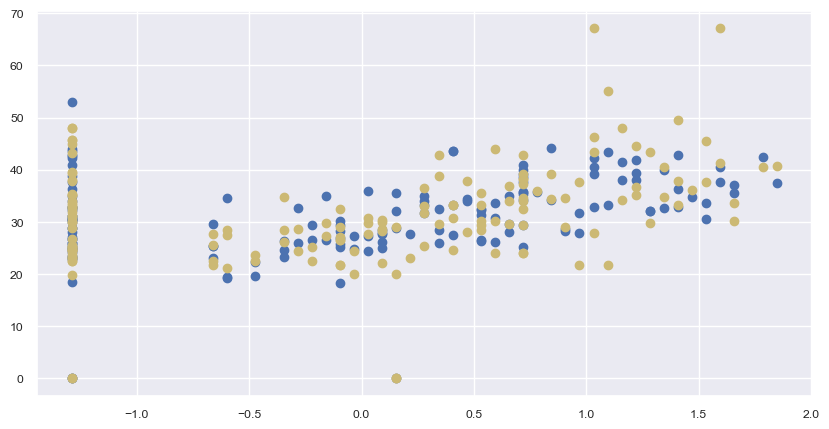

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차 (DecisionTreeRegressor)', mean_squared_error(ly_preds, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], Y_test, label='Y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

## Random Forest

평균제곱근오차 (RandomForestRegressor) 48.55049060389612


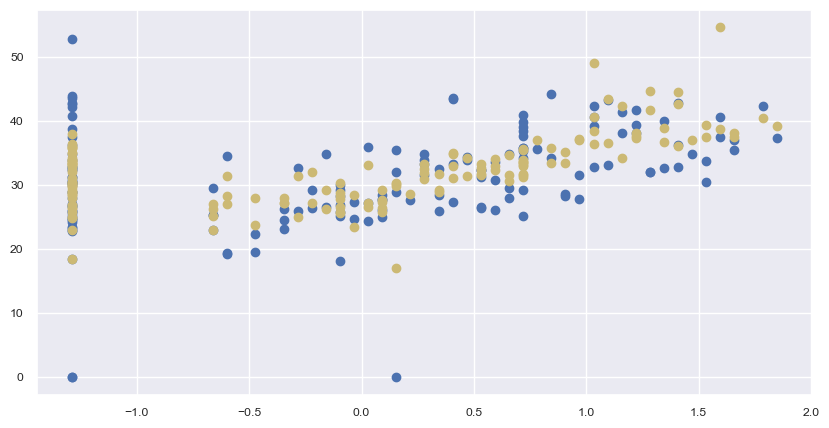

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor()
model.fit(X_train, Y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차 (RandomForestRegressor)', mean_squared_error(ly_preds, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], Y_test, label='Y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

## Support Vector Regressor

평균제곱근오차 (SVR) 47.50305766773739


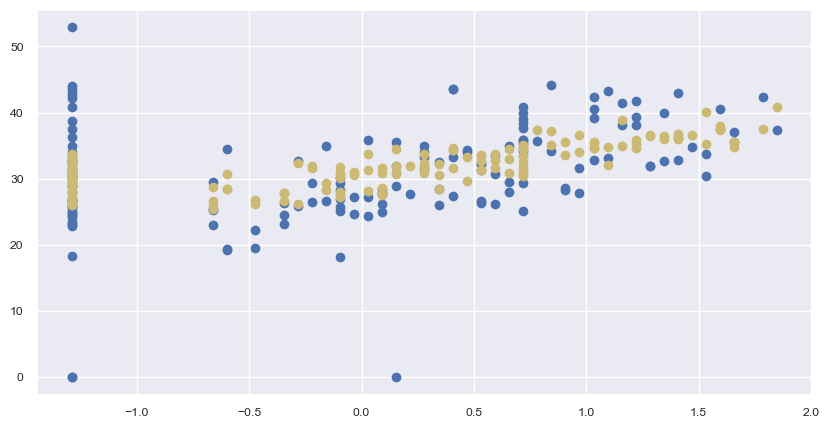

In [71]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

model = SVR()
model.fit(X_train, Y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차 (SVR)', mean_squared_error(ly_preds, Y_test))

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], Y_test, label='Y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

# 결론
## 위의 데이터에서는 Decision Tree가 가장 높은 예측률을 가지고 있다.